In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('US_Accidents_March23.csv')

In [2]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year  
df = df[df['Year'] != 2023]

In [4]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2192380
Wind_Chill(F)            1990741
Wind_Speed(mph)           563451
Visibility(mi)            170230
Wind_Direction            167423
Humidity(%)               167397
Weather_Condition         166830
Temperature(F)            157679
Pressure(in)              135013
Weather_Timestamp         114894
Airport_Code               21759
Sunrise_Sunset             21571
Civil_Twilight             21571
Nautical_Twilight          21571
Astronomical_Twilight      21571
Street                     10099
Timezone                    7579
Zipcode                     1856
City                         251
Description                    5
Railway                        0
No_Exit                        0
Station                        0
Roundabout                     0
Give_Way                       0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

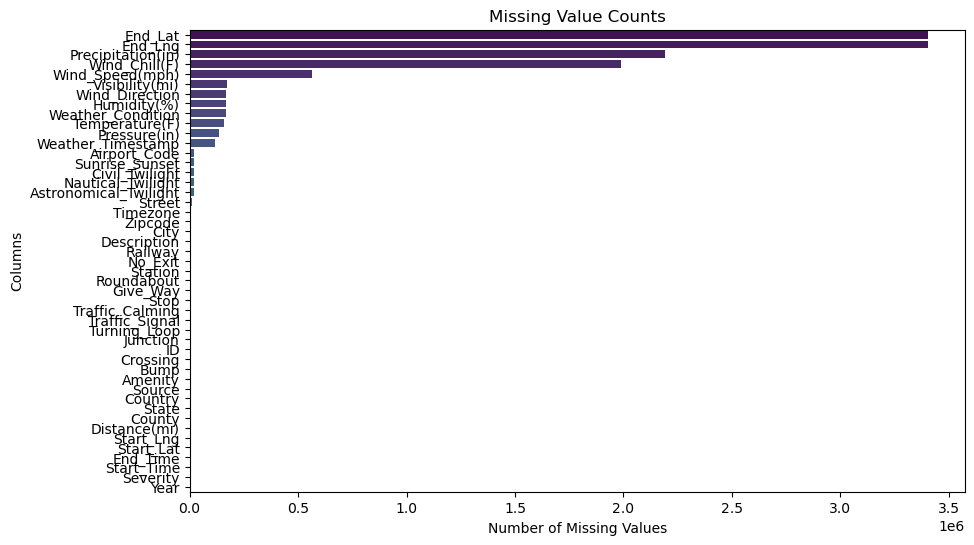

In [5]:
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Missing Value Counts')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [7]:
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

Coastal_or_Inland_Regions
Coastal_Regions    4580470
Inland_Regions     2736924
Others              164367
Name: Coastal_or_Inland_Regions, dtype: int64


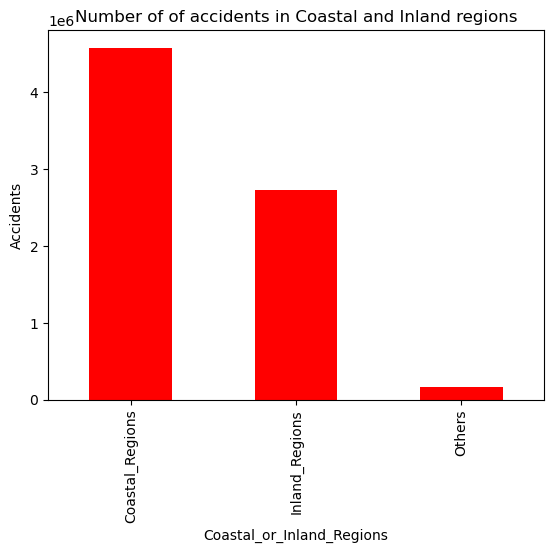

In [6]:
Coastal_Regions = ['CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC']
Inland_Regions = ['OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 'WY', 'ID', 'ND', 'MT', 'SD']

def classify(state):
    if state in Coastal_Regions:
        return 'Coastal_Regions'
    elif state in Inland_Regions:
        return 'Inland_Regions'
    else:
        return 'Others'
df['Coastal_or_Inland_Regions'] = df['State'].apply(classify)

df_Coastal_or_Inland_Regions = df.groupby(['Coastal_or_Inland_Regions'])['Coastal_or_Inland_Regions'].count()
print(df_Coastal_or_Inland_Regions)

df_Coastal_or_Inland_Regions.plot(kind='bar')
ax = df_Coastal_or_Inland_Regions.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in Coastal and Inland regions")
plt.show()

Location
East      3961037
Middle    1156600
West      2364124
Name: Location, dtype: int64


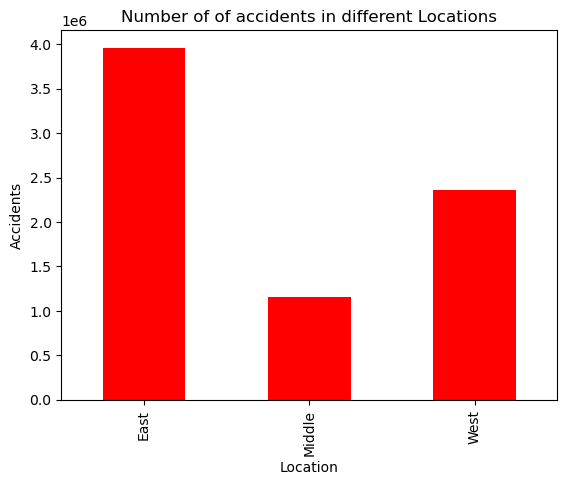

In [7]:
df['State'].unique()

west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 'WI', 'IL']

def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
df['Location'] = df['State'].apply(classify_state)

df_location = df.groupby(['Location'])['Location'].count()
print(df_location)

df_location.plot(kind='bar')
ax = df_location.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Locations")
plt.show()

In [8]:
df3 = df.groupby(['State'])['State'].count().sort_values(ascending=False)


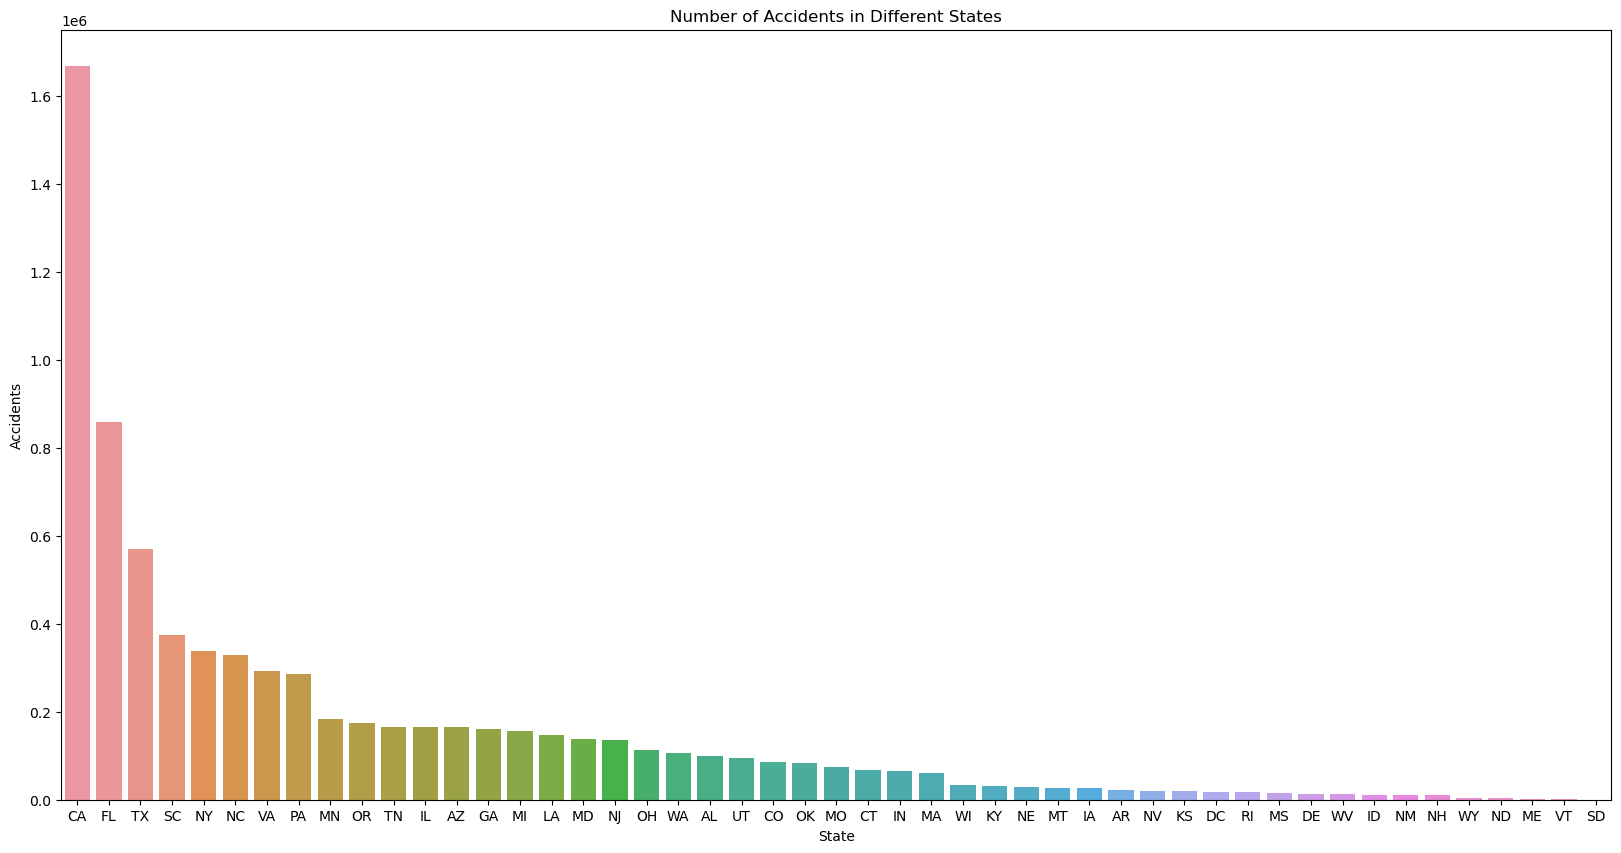

In [9]:

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df3.index, y=df3)
plt.ylabel('Accidents')
plt.title("Number of Accidents in Different States")

plt.show()

###### CA, FL, TX, SC, NY are top five states with the highest accident number. 

In [10]:
df5 = df.groupby(['City'])['City'].count().sort_values(ascending=False)

df_first_20 = df5.iloc[:20]

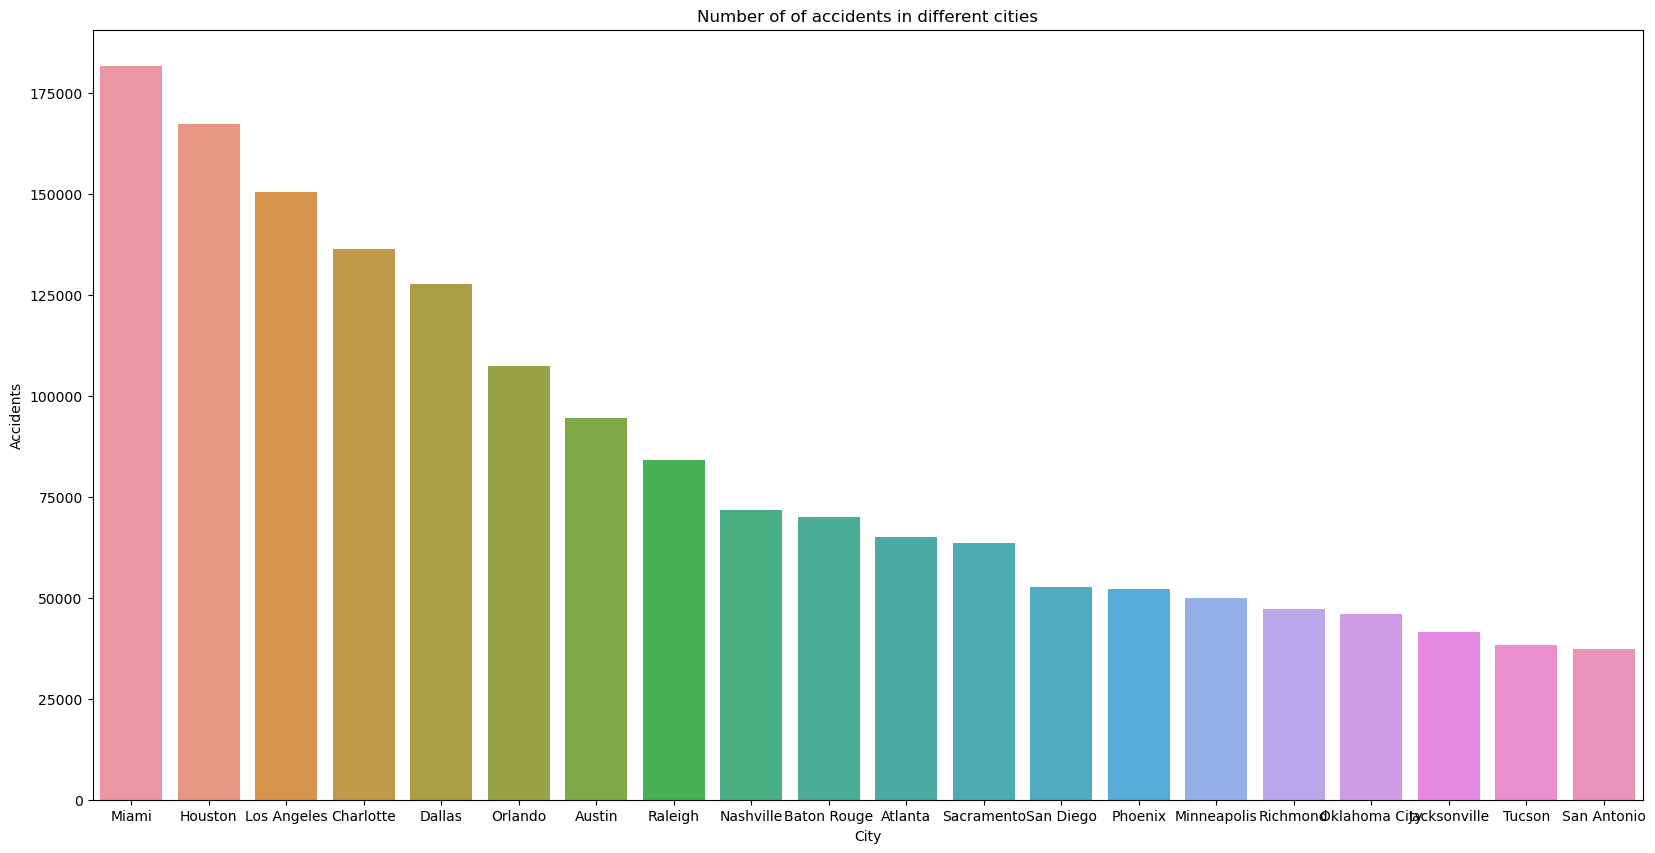

In [11]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_20.index, y=df_first_20)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")

plt.show()

###### Miami, Houston, Los Angeles, Charlotte, Dallas are top five cities with the highest accident number. 

Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
Name: Year, dtype: int64


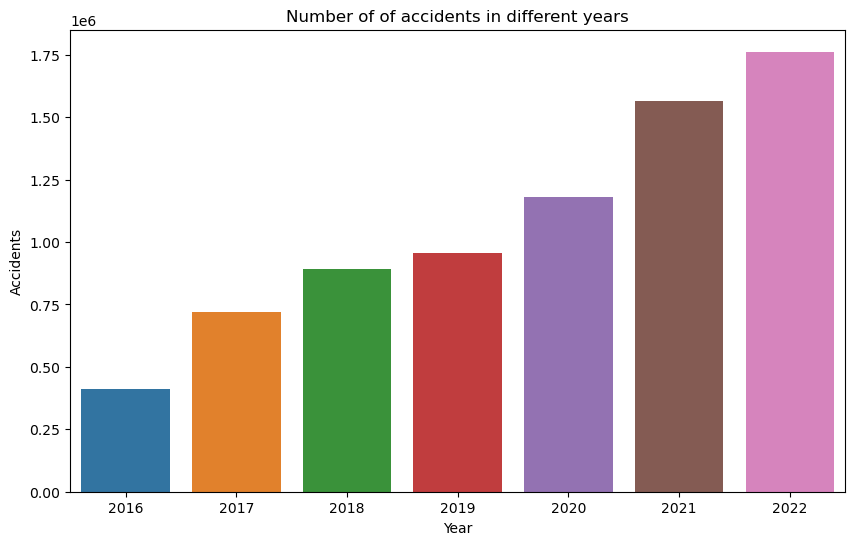

Year
2016      NaN
2017    74.79
2018    24.42
2019     6.81
2020    23.54
2021    32.64
2022    12.71
Name: Year, dtype: float64


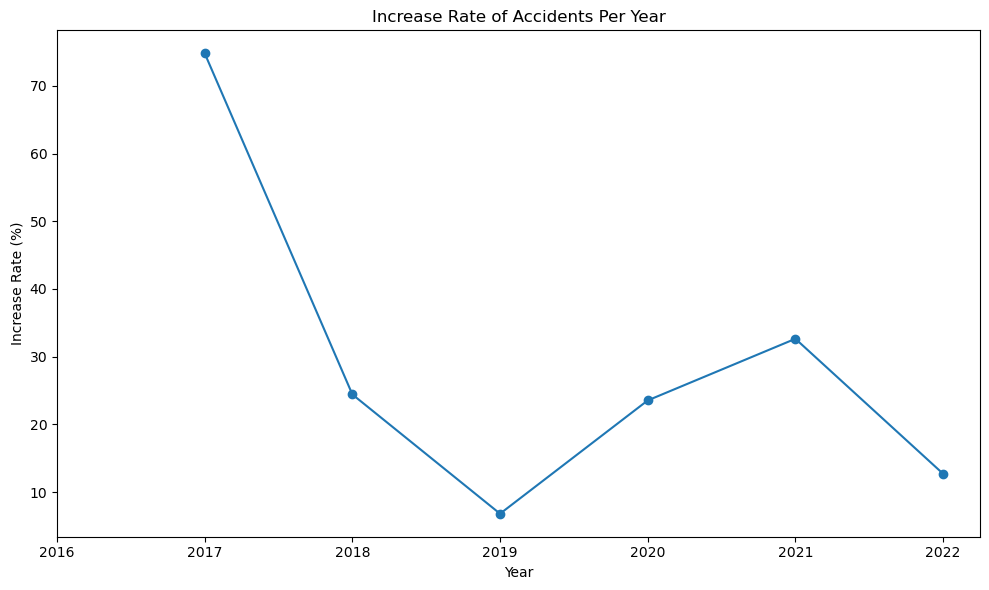

29.15

In [12]:
df['Year'] = df['Start_Time'].dt.year  
df7 = df.groupby(['Year'])['Year'].count().sort_values(ascending=True)
print(df7)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df7.index, y=df7)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different years")
plt.show()

df_increase_rate = df7.pct_change() * 100
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

plt.figure(figsize=(10, 6))
plt.plot(df_increase_rate.index, df_increase_rate.values, marker='o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(False)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()

average_increase = df_increase_rate.mean()
average_increase = average_increase.round(2)
average_increase


###### # The figure for accidents increases from 410821 in 2016 to 1762452 in 2022.
###### In 2017, there was a significant increase of 74.79%, suggesting a notable increase compared to 2016.
###### The average yearly increase of accidents in US is 29.15% from 2016 to 2022.


In [13]:
def plot_state_variation(data, year1, year2):
    df_year1 = data[data['Year'] == year1]
    df_year2 = data[data['Year'] == year2]

    df_year1_state = df_year1.groupby('State')['ID'].count().reset_index(name=f'Count-{year1}')
    df_year2_state = df_year2.groupby('State')['ID'].count().reset_index(name=f'Count-{year2}')

    new_df_both = pd.merge(df_year2_state, df_year1_state, on='State', how='inner')

    new_df_both['Variation'] = new_df_both[f'Count-{year2}'] - new_df_both[f'Count-{year1}']

    new_df_both = new_df_both.sort_values(by='Variation', ascending=False)

    plt.figure(figsize=(20, 10))  
    sns.barplot(x='State', y='Variation', data=new_df_both)

    plt.xlabel('State')
    plt.ylabel('Variation')
    plt.title(f'Variation by State from {year1} to {year2}')

    plt.show()



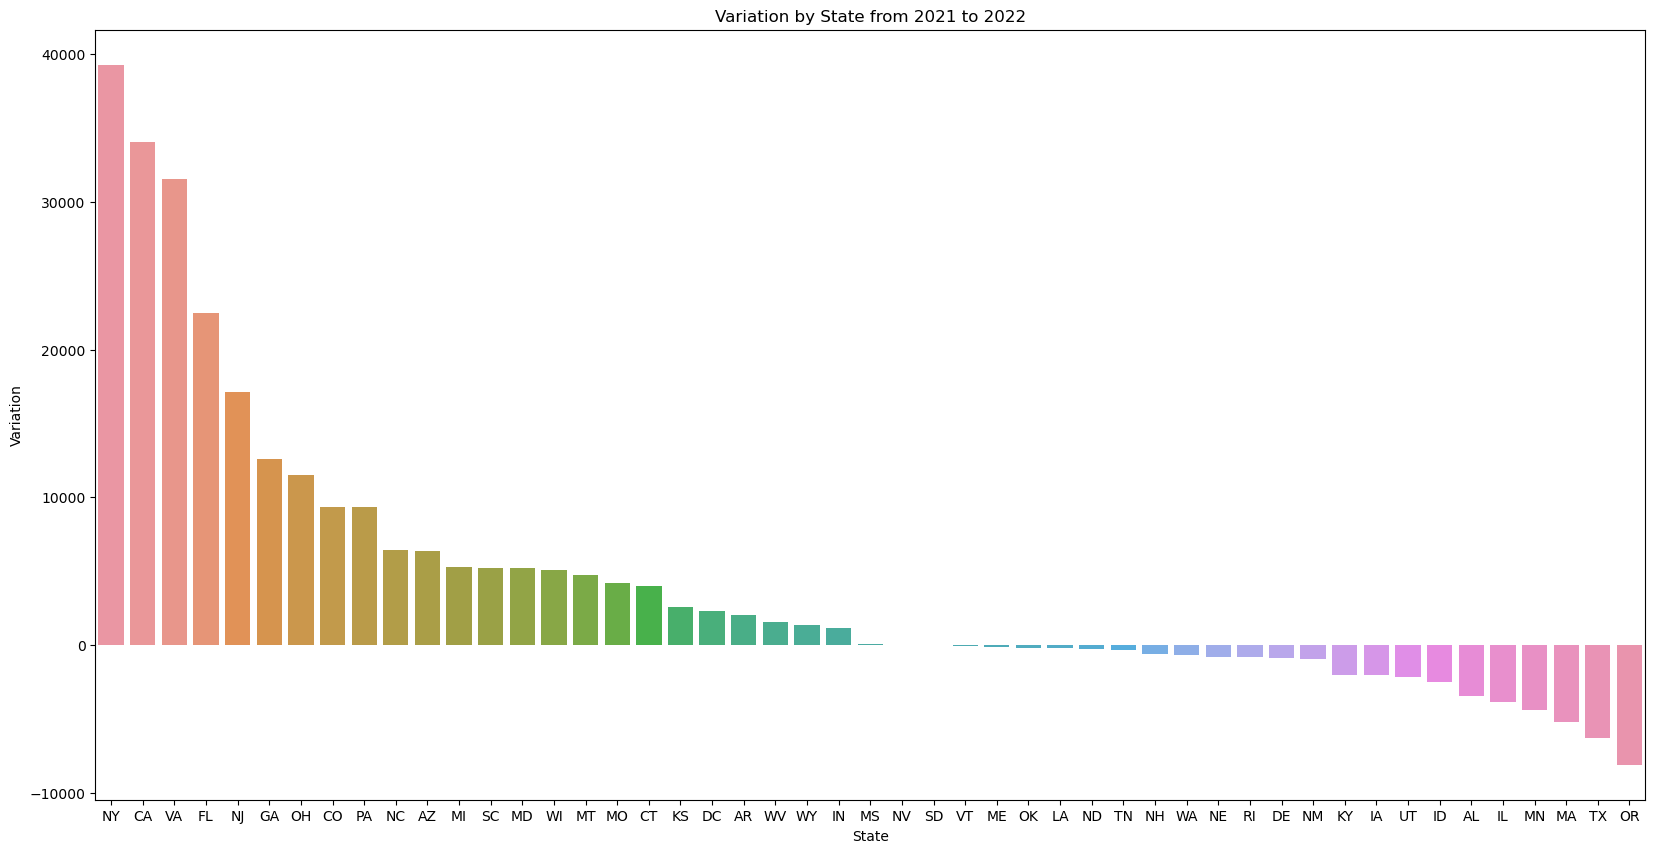

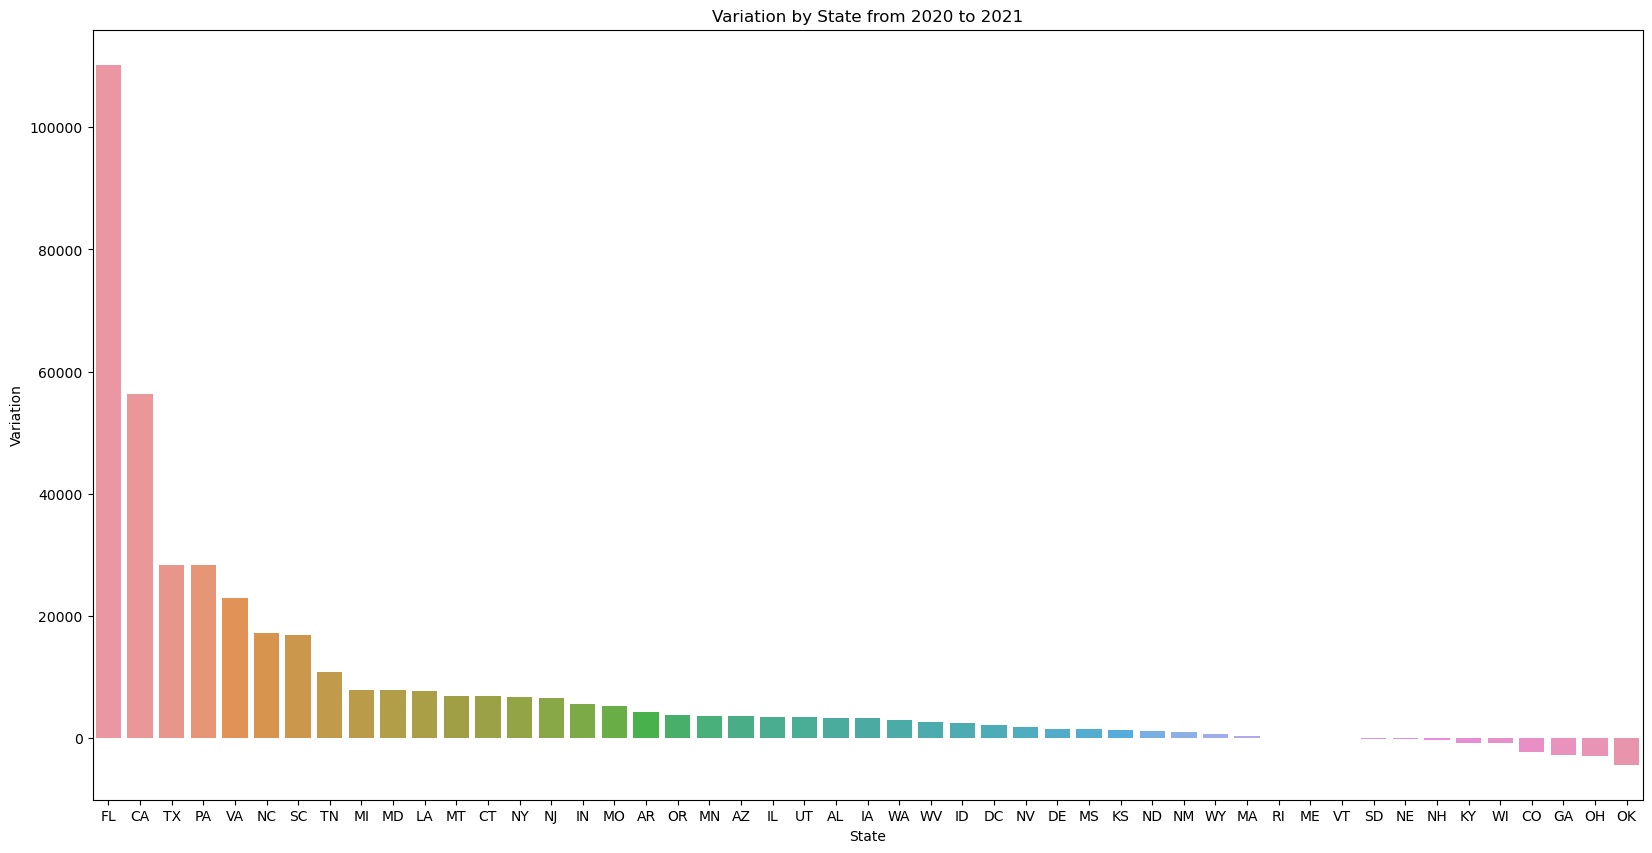

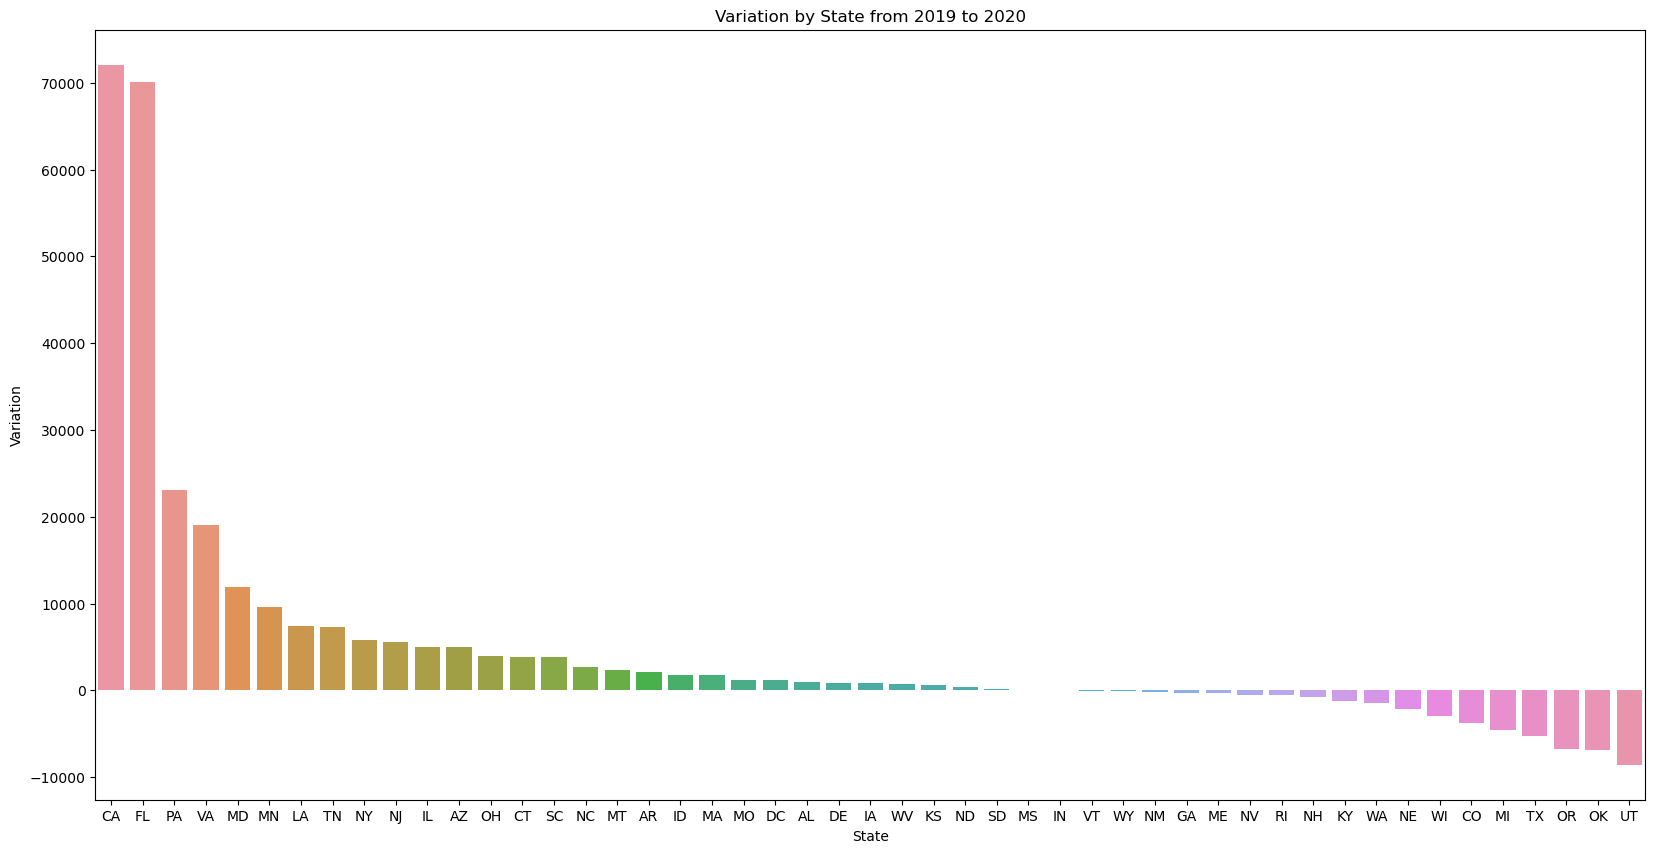

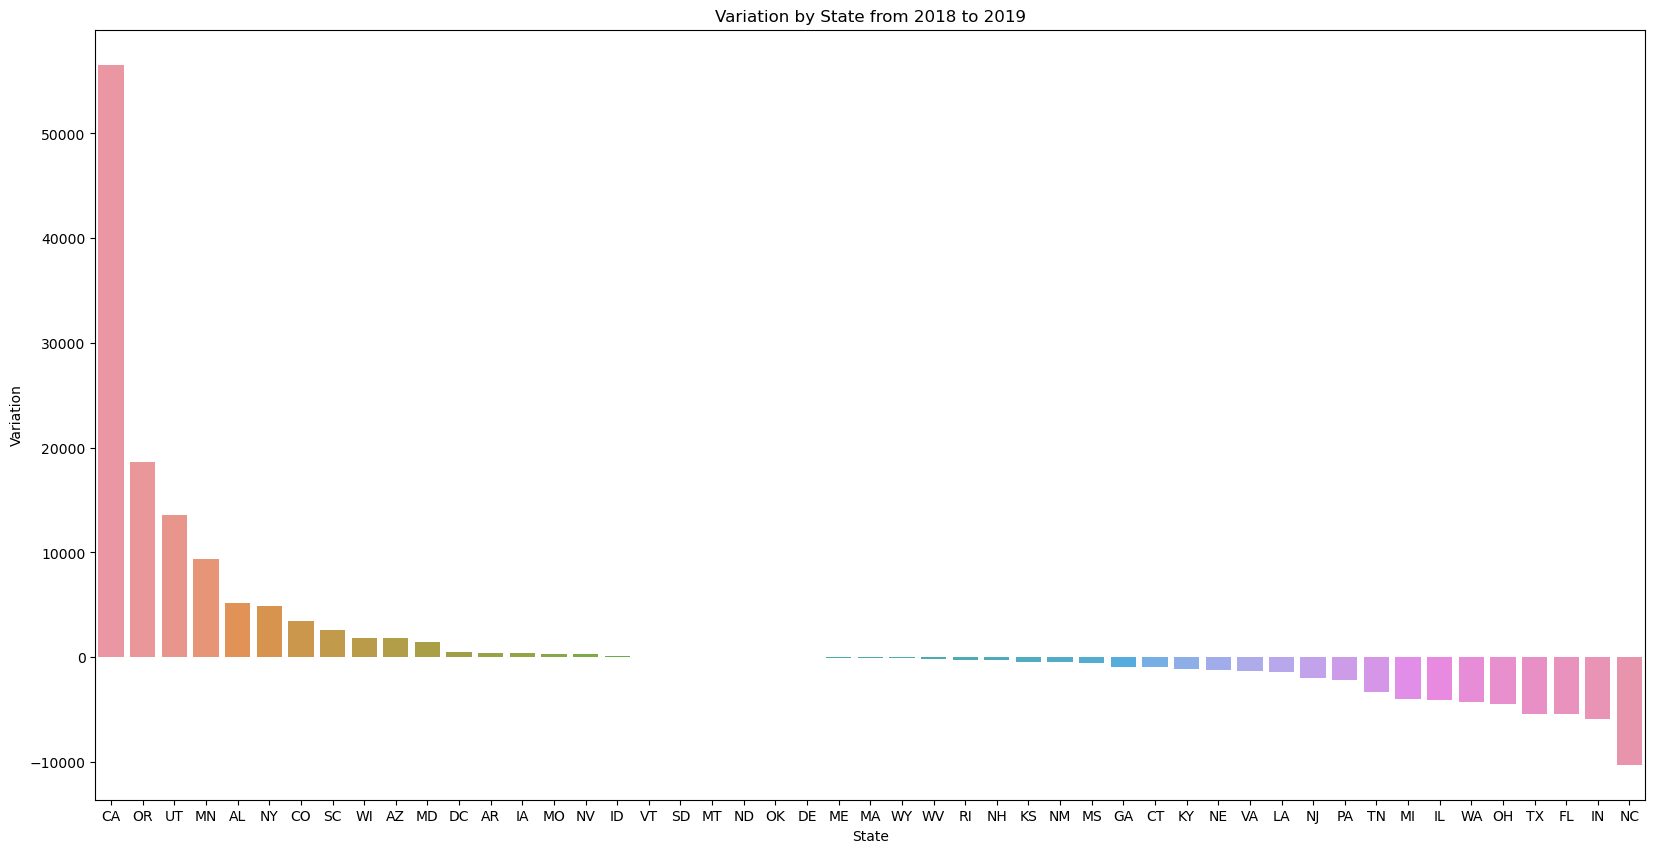

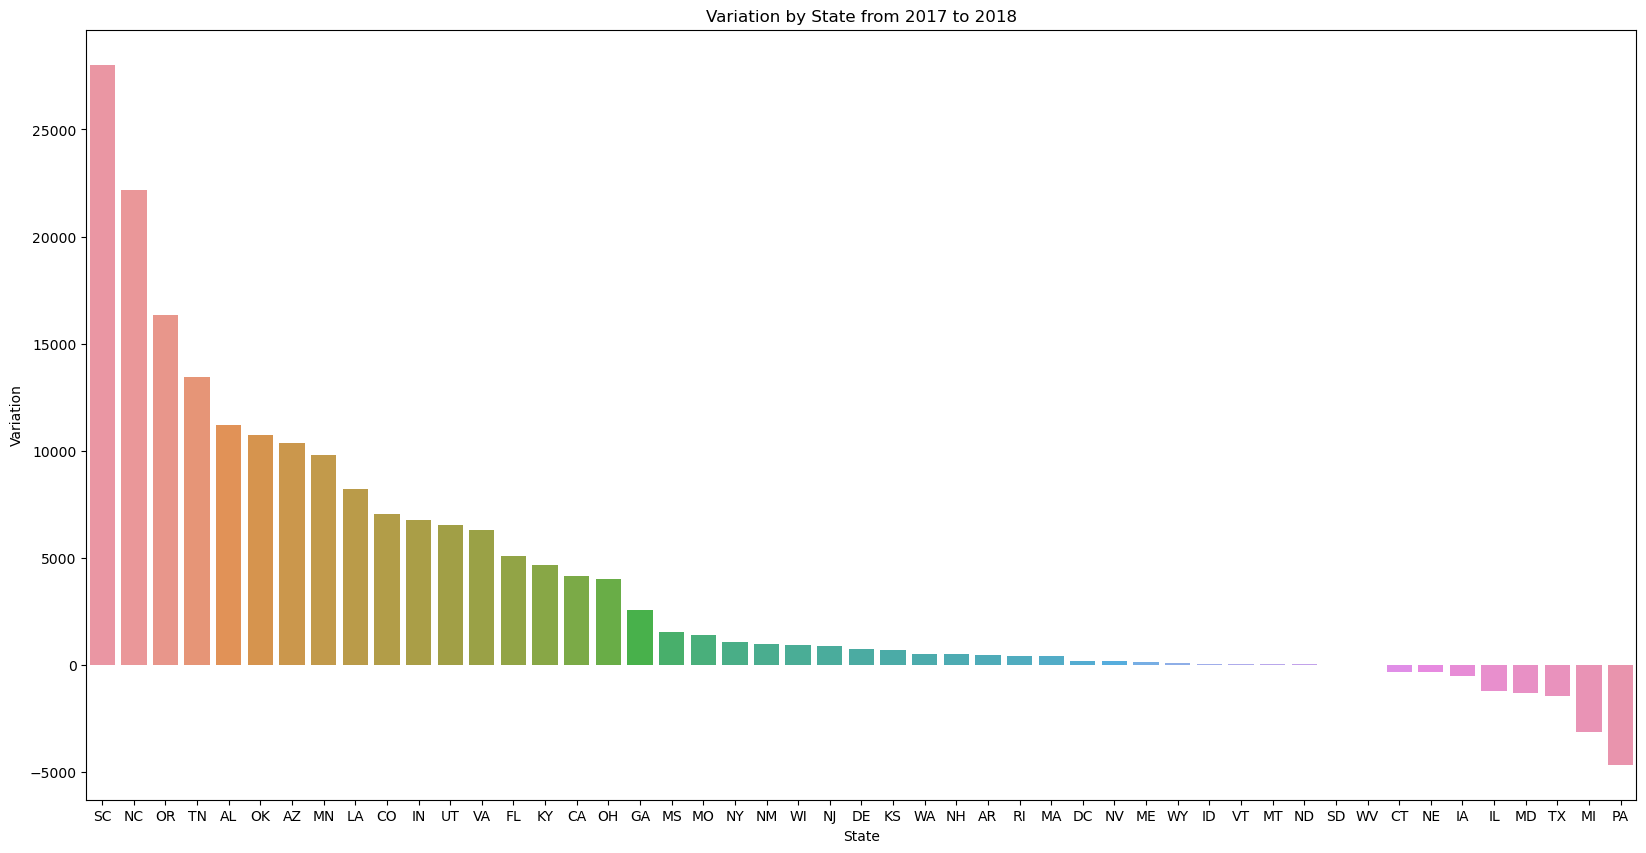

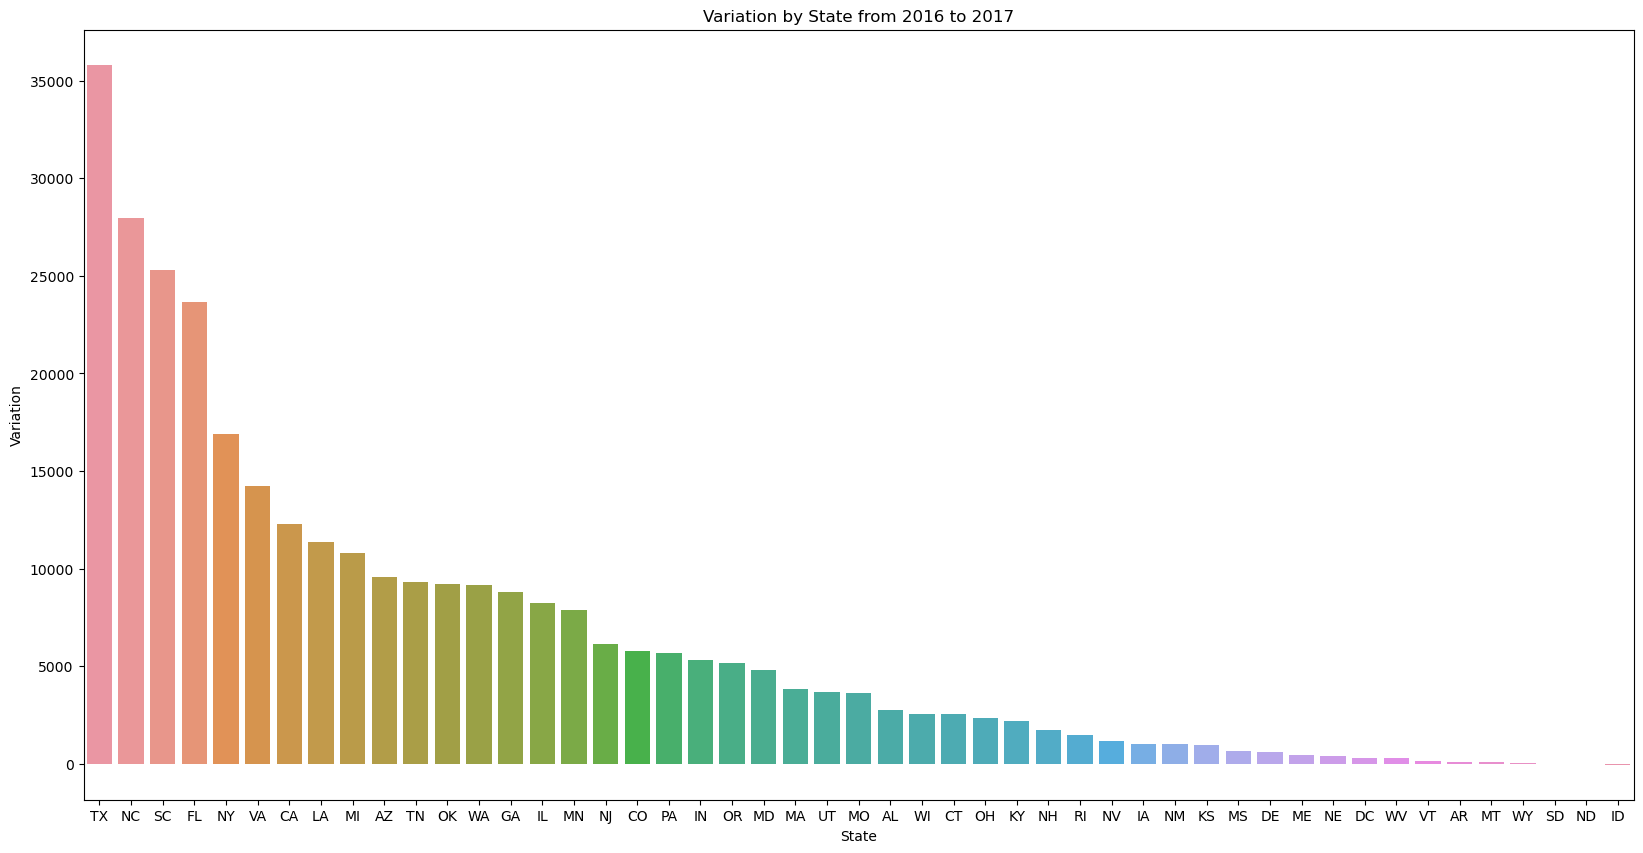

In [14]:
plot_state_variation(df, 2021, 2022)
plot_state_variation(df, 2020, 2021)
plot_state_variation(df, 2019, 2020)
plot_state_variation(df, 2018, 2019)
plot_state_variation(df, 2017, 2018)
plot_state_variation(df, 2016, 2017)

###### The increase rate of accidents in 2022 is 12.71%, what are states that contribute to this growth? 
###### Top five states are NA,CA,FL,NJ,GA. In order to slow down the yearly increase of accidents, the government should put their focus on reducing accident numbers of these states.
###### The increase rate of accidents in 2021 is 32.64%, what are states that contribute to this growth? 
###### Top five states are FL,CA,TX,PA,VA. In order to slow down the yearly increase of accidents, the government should put their focus on reducing accident numbers of these states.

In [15]:
df['Month'] = df['Start_Time'].dt.month 
df9 = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df9)

Month
12    847343
11    760165
10    675130
9     651381
2     603452
8     599666
1     591032
4     587300
6     571373
5     558176
3     524408
7     512335
Name: Month, dtype: int64


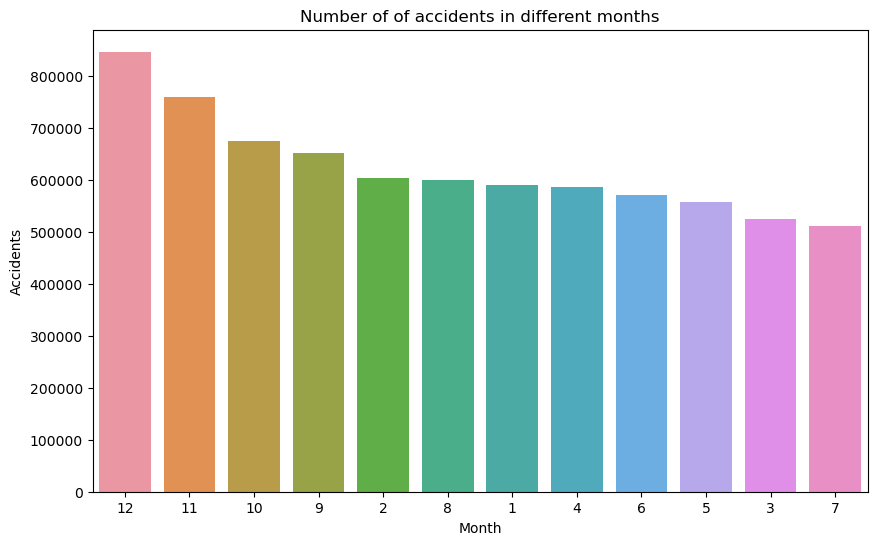

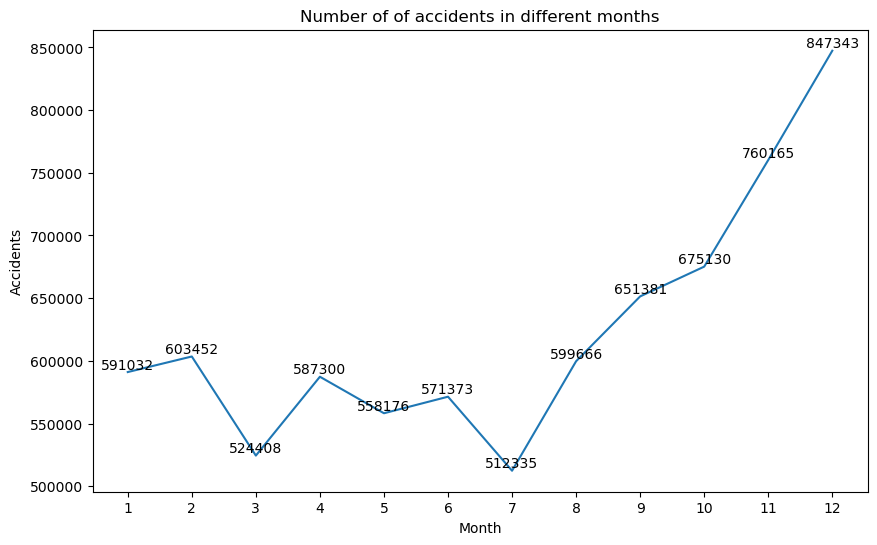

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df9.index, y=df9.values, order=df9.index)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=df9.index, y=df9.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different months")
plt.xticks(df9.index)  

for x, y in zip(df9.index, df9.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

###### December,November and October have relatively large numbers of accidents.
###### April,June and May have relatively small numbers of accidents.

In [17]:
df['Weekday'] = df['Start_Time'].dt.weekday 
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)

Weekday
4    1326626
3    1278055
2    1272842
1    1249508
0    1174058
5     645655
6     535017
Name: Weekday, dtype: int64


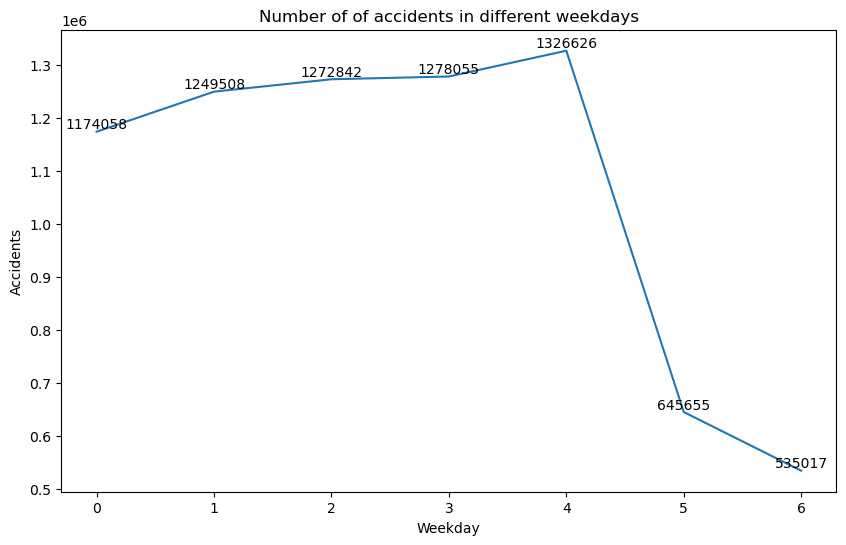

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=df11.index, y=df11.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different weekdays")
plt.xticks(df11.index)  

for x, y in zip(df11.index, df11.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

###### Weekdays has accident numbers that are twice as high as those during the weekend.

In [19]:
df['Hours'] = df['Start_Time'].dt.hour 
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)


Hours
0     107770
1      93326
2      89573
3      80532
4     156094
5     221061
6     392588
7     570282
8     562356
9     351785
10    332821
11    344521
12    343332
13    383342
14    433033
15    507572
16    564017
17    559057
18    418223
19    285436
20    217469
21    184426
22    161682
23    121463
Name: Hours, dtype: int64


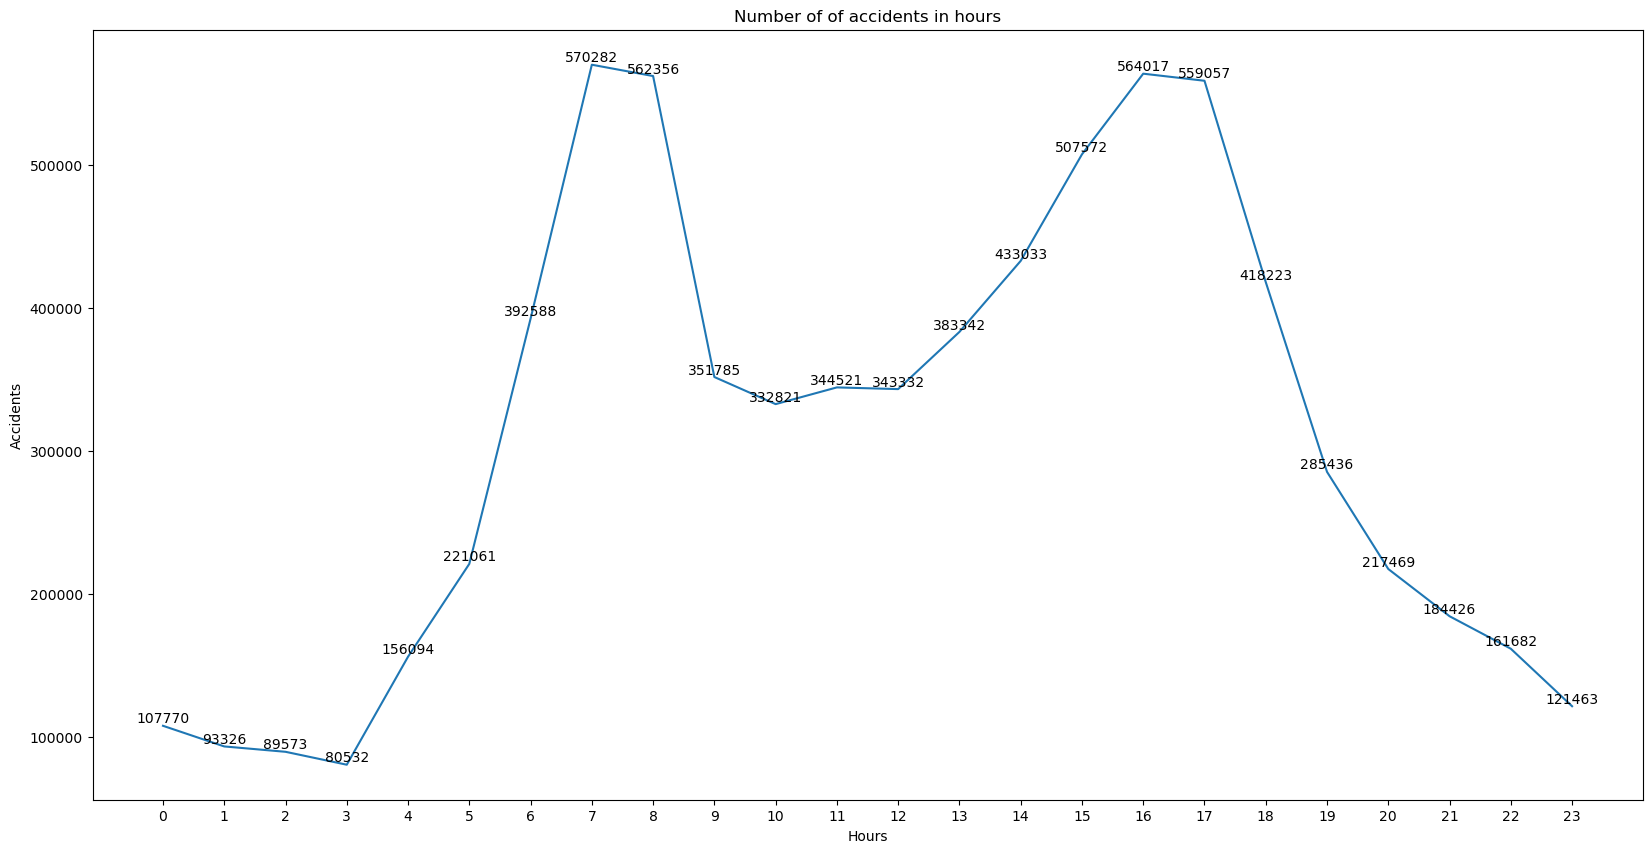

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=df13.index, y=df13.values)
plt.ylabel('Accidents')
plt.title("Number of of accidents in hours")
plt.xticks(df13.index)  
for x, y in zip(df13.index, df13.values):
    ax.text(x, y, str(y), ha='center', va='bottom')
plt.show()

###### 4:00 PM and 5:00 PM have the highest accidents.
###### Accident counts are high at 7:00 AM and 8:00 AM, possibly due to Morning Commute.
###### Accidents remain relatively steady from 9:00 AM to 1:00 PM, which maintains a medium level.
###### Accidents decrease after 6:00 PM, and this trend has been continued during the evening and night.
###### 4:00 AM has high accident counts, it is possible that people start to commute.
###### Fewer accidents occur at midnight and early morning.

Weather_Condition
Fair                2463598
Mostly Cloudy        990247
Clear                808743
Cloudy               769429
Partly Cloudy        685487
Overcast             382866
Light Rain           336701
Scattered Clouds     204829
Light Snow           116468
Fog                   93622
Rain                  79308
Haze                  75252
Fair / Windy          33847
Heavy Rain            30929
Light Drizzle         21861
Name: Weather_Condition, dtype: int64


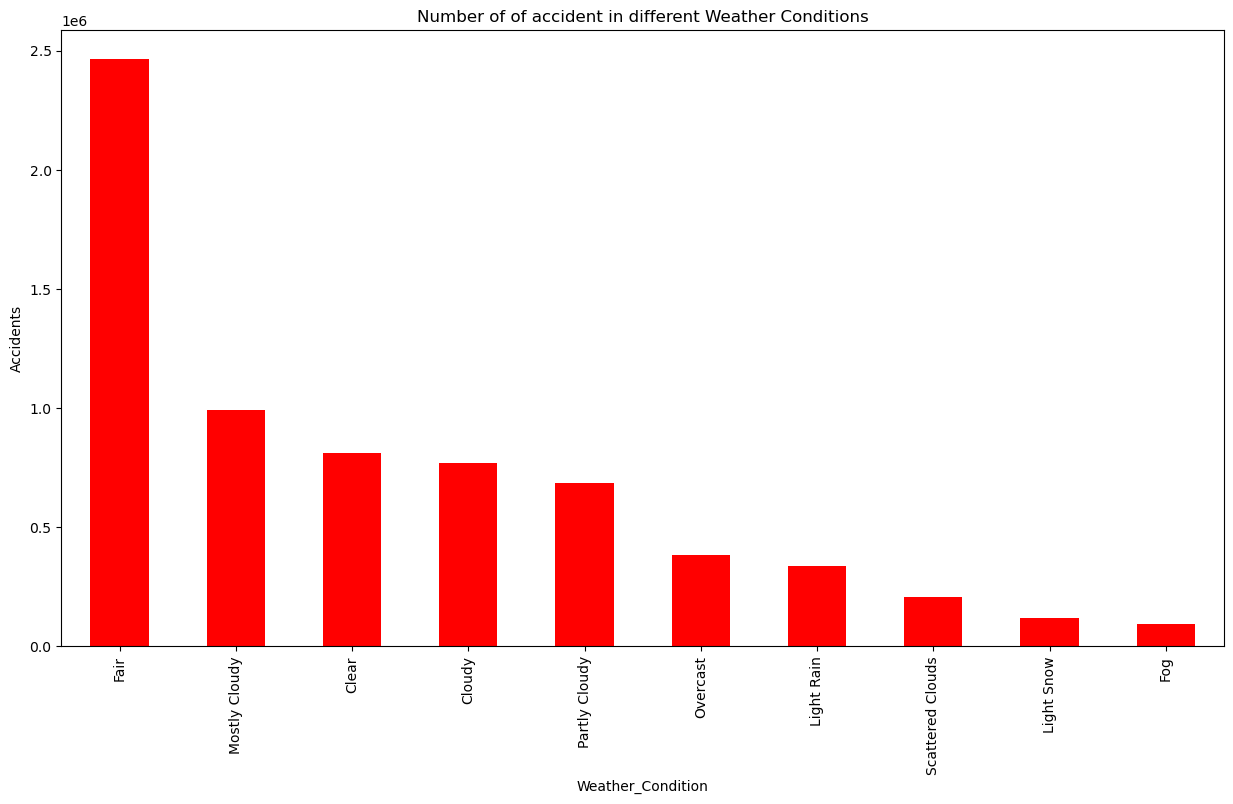

In [21]:
df15 = df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(df15.head(15))
df16=df15.iloc[:10]
plt.figure(figsize=(15, 8))
df16.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()

###### Clear and fair conditions result in the highest accidents.
###### Cloudy weather contributes significantly, accounting for around 1.35 million accidents.
###### Rain-related conditions cause about 100000 accidents.
###### Adverse Conditions (Snow, fog, haze) cause roughly 200000 accidents.

Severity
2    5917409
3    1299337
4     197649
1      67366
Name: Severity, dtype: int64


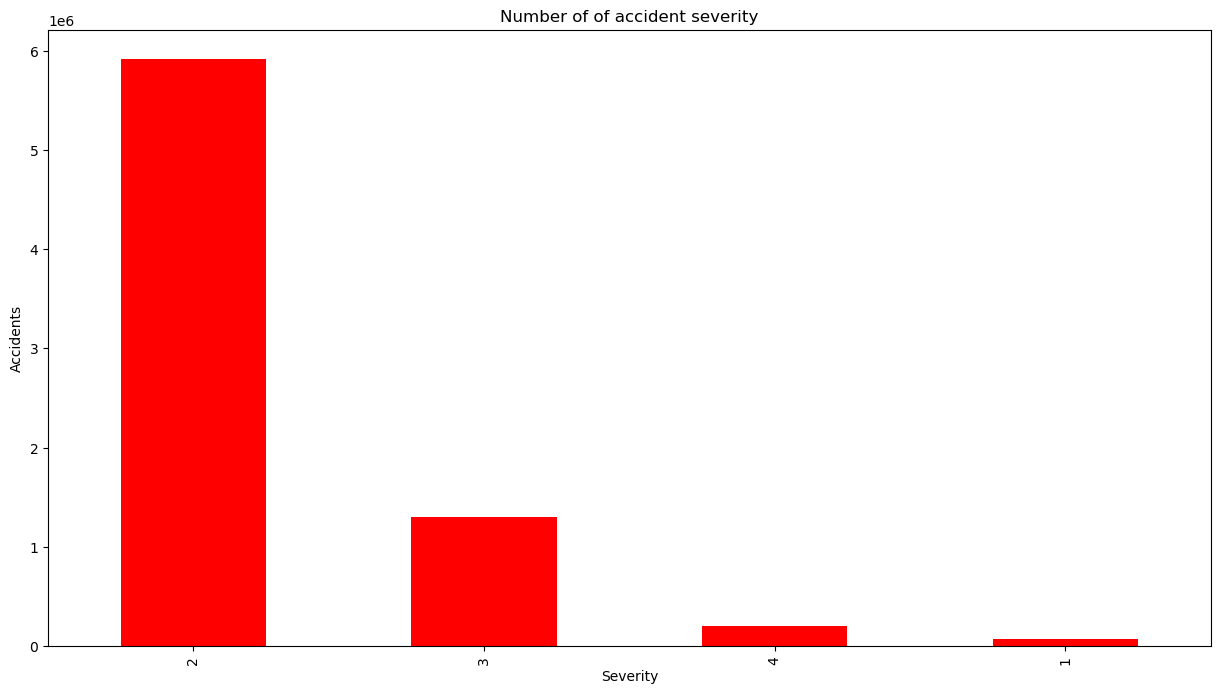

In [22]:
df17 = df.groupby(['Severity'])['Severity'].count().sort_values(ascending=False)
print(df17)
df18=df17.iloc[:10]
plt.figure(figsize=(15, 8))
df17.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident severity")
plt.show()

###### Severity 2 accidents are the most common.
###### Severity 3 accidents are the second Largest common.

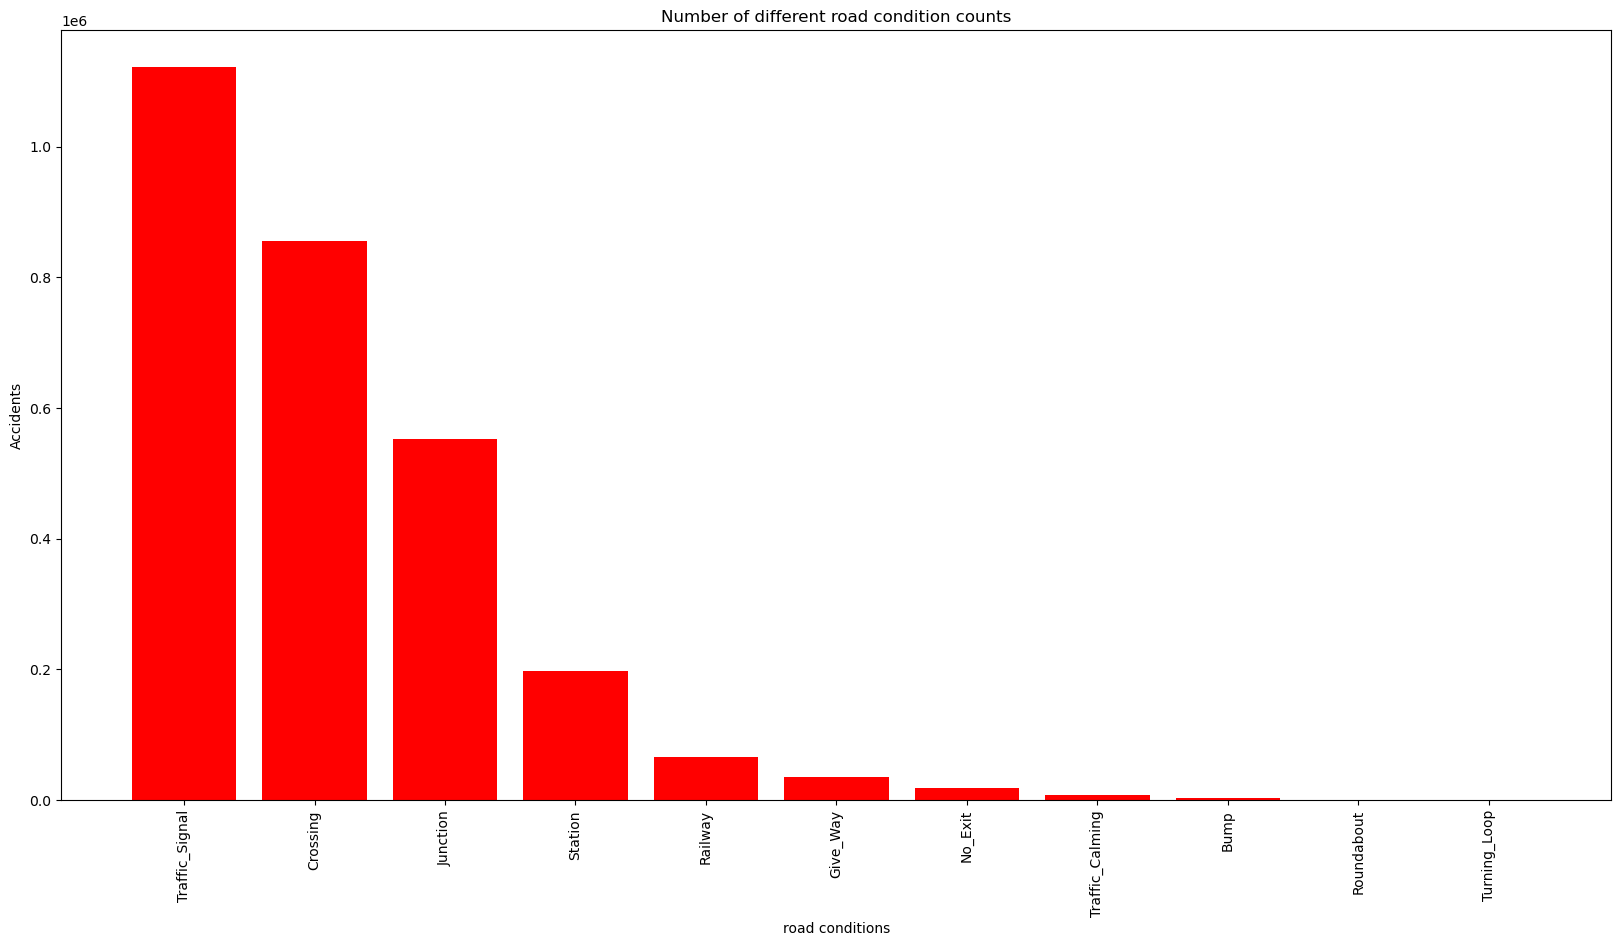

In [23]:
columns = ['Crossing', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
           'Station', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
true_counts = []
for column in columns:
    true_count = df[column].value_counts().get(True, 0)
    true_counts.append(true_count)

sorted_counts = sorted(true_counts, reverse=True)
sorted_columns = [column for _, column in sorted(zip(true_counts, columns), reverse=True)]

plt.figure(figsize=(20, 10))
plt.bar(sorted_columns, sorted_counts,color='red')
plt.xlabel('road conditions')
plt.ylabel('Accidents')
plt.title("Number of different road condition counts")
plt.xticks(rotation=90)
plt.show()

###### Common road accident features of traffic accidents are Traffic_Signal, crossing, junction,station and railway.

C:\Users\priyam jain\AppData\Local\Temp\ipykernel_14080\3330274680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


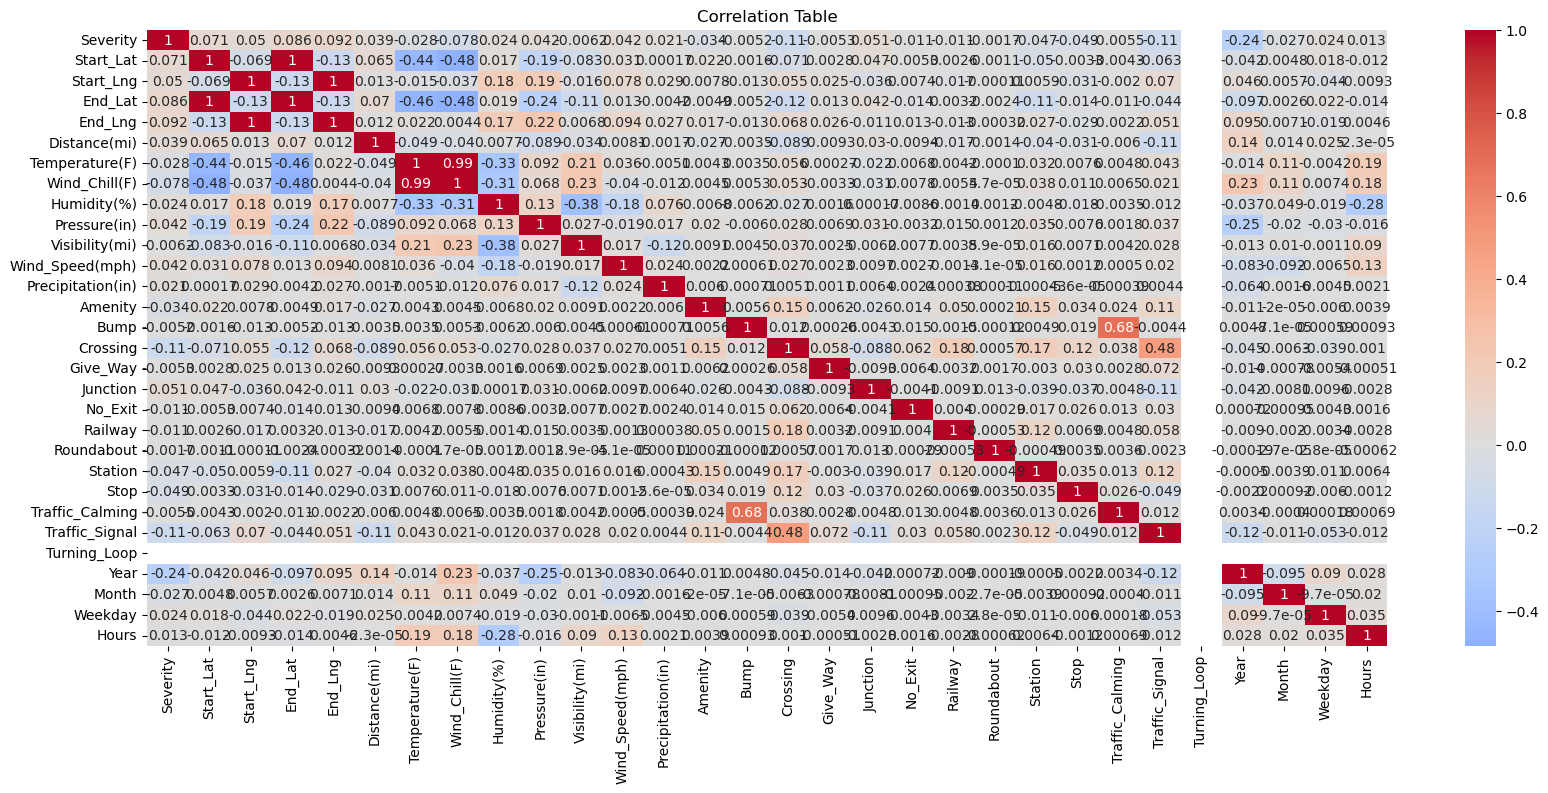

In [25]:
plt.figure(figsize=(20,8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Table')
plt.show()

###### Temperature and Wind_Chill have a very strong positive correlation.
###### Traffic_Signal, Junction and Crossing seem to have a negative correlation with severity.
